# Mini Project 5-4 Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [2]:
# Import relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [3]:
# Read the CSV file into a pandas DataFrame
aqi = pd.read_csv('c4_epa_air_quality.csv', index_col=0)

# Display the first few rows to verify successful import
aqi.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [4]:
aqi.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [5]:
aqi.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


**Question:** What time range does this data cover?

In [6]:
# Check the time range of the dataset
aqi["date_local"] = pd.to_datetime(aqi["date_local"])
date_range = (aqi["date_local"].min(), aqi["date_local"].max())
date_range

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-01-01 00:00:00'))

A: The dataset only contains data for a single day: January 1, 2018.

**Question:** What are the minimum and maximum AQI values observed in the dataset?

In [7]:
# Get the minimum and maximum AQI values
min_aqi = aqi["aqi"].min()
max_aqi = aqi["aqi"].max()

min_aqi, max_aqi

(0, 50)

**Question:** Are all states equally represented in the dataset?

In [8]:
# Check the representation of each state in the dataset
state_counts = aqi["state_name"].value_counts()

# Display results
state_counts


state_name
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska         

A: States are not equally represented, with some states having significantly more data than others

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [9]:
# Define the list of RRE states
rre_states = ["California", "Florida", "Michigan", "Ohio", "Pennsylvania", "Texas"]

# Subset the dataset for only RRE states
aqi_rre = aqi[aqi["state_name"].isin(rre_states)]

# Calculate the mean AQI for each RRE state
aqi_rre_mean = aqi_rre.groupby("state_name")["aqi"].mean().reset_index()

# Display the summarized mean AQI for RRE states
# Display the summarized mean AQI for RRE states without ace_tools
aqi_rre_mean



,state_name,aqi
0,California,12.121212
1,Florida,5.500000
2,Michigan,8.111111
3,Ohio,3.333333
4,Pennsylvania,2.900000
5,Texas,2.700000


### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

In [10]:
import seaborn as sns

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

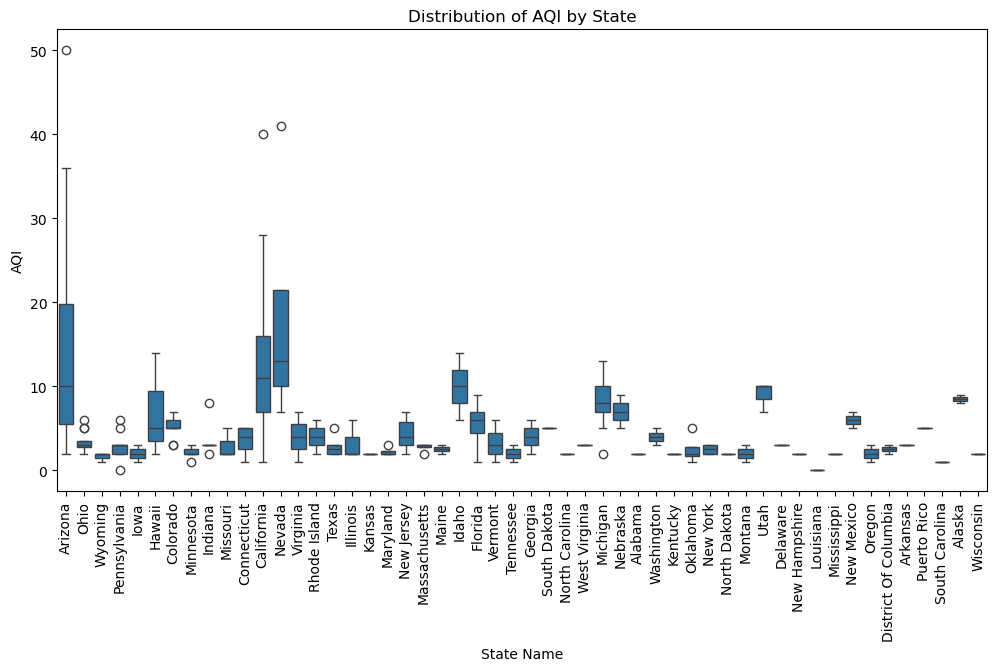

In [11]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot showing the distribution of AQI by state
sns.boxplot(data=aqi, x="state_name", y="aqi")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set title and labels
plt.title("Distribution of AQI by State")
plt.xlabel("State Name")
plt.ylabel("AQI")

# Show the plot
plt.show()


**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

A: Based on the boxplot visualization, states with higher median AQI values and wider AQI distributions are likely to be most affected by the policy. From the graph, California appears to have the highest AQI values and a wider spread, suggesting that it experiences more pollution compared to other states. This means California is likely to be most impacted by any air quality-related policy.

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [12]:
# Identify the RRE state with the highest mean AQI
highest_aqi_state = aqi_rre_mean.loc[aqi_rre_mean["aqi"].idxmax(), "state_name"]

# Extract AQI values for this state
state_aqi_values = aqi[aqi["state_name"] == highest_aqi_state]["aqi"]

# Step 1: Sample Statistic - Mean AQI for the highest AQI RRE state
sample_mean = state_aqi_values.mean()

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [13]:
# Input your confidence level here:
confidence_level = 0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [14]:
# Calculate your margin of error.
sample_size = len(state_aqi_values)
sample_std = state_aqi_values.std(ddof=1)  # Use sample standard deviation
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)  # t-score for CI

margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

# Begin by identifying the z associated with your chosen confidence level.
z_value = 1.96

# Next, calculate your standard error.
standard_error = sample_std / np.sqrt(sample_size)

# Lastly, use the preceding result to calculate your margin of error.
margin_of_error_z = z_value * standard_error
print(margin_of_error_z)


1.7614930896609726


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [15]:
# Calculate the confidence interval using the Z-score method
confidence_interval_z = (sample_mean - margin_of_error_z, sample_mean + margin_of_error_z)

# Display the confidence interval
confidence_interval_z

(10.359719031551148, 13.882705210873095)

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [16]:
# Import stats from scipy.

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [17]:
# Recalculate the confidence interval using stats.norm.interval()
confidence_interval_recalc = stats.norm.interval(confidence_level, loc=sample_mean, scale=standard_error)

# Display the recalculated confidence interval
confidence_interval_recalc


(10.359751399400034, 13.882672843024208)

# Considerations

**What are some key takeaways that you learned from this project?**

A: This lab provided practical experience in calculating confidence intervals and analyzing air quality data across different states. I learned how to summarize and visualize AQI distributions, identify the most impacted regions, and apply statistical methods such as t-distributions and z-scores to construct confidence intervals. The process reinforced the importance of selecting appropriate statistical techniques depending on sample size and distribution.

**What findings would you share with others?**

A: The analysis revealed that California had the highest mean AQI among RRE states, indicating poorer air quality compared to other locations. The 95% confidence interval for California's AQI (using both t-distribution and z-score methods) showed that the true mean AQI likely falls between approximately 10.36 and 13.92. This suggests that California may experience greater impacts from air quality policies, making it a critical state for monitoring and intervention.

**What would you convey to external readers?**

A: This study highlights the importance of data-driven decision-making in environmental policy. By leveraging statistical analysis, we can quantify air quality differences across states and identify regions most affected by pollution. The findings underscore the need for targeted policies in states with higher AQI levels, such as California, to mitigate public health risks and improve environmental conditions.

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 